## Initial setup

Validate your python environment here.

In [1]:
import gzip
import os
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import rdkit
import rdkit.Chem
import rdkit.Chem.Draw


Specify some configurations for the notebook.

In [2]:
DOWNLOAD_DIR = "datasets"

SOURCES = {
    "clintox": {
        "download_url": "https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/clintox.csv.gz",
        "file_name": "clintox.csv",
    },
    "toxcast": {
        "download_url": "https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/toxcast_data.csv.gz",
        "file_name": "toxcast.csv",
    },
}

Now we'll define some data loading helpers:
- `fetch_data` downloads a local copy of the files specified in `SOURCES` above.
- `load_data(name)` returns a dataframe that was extracted from the downloaded file.

Example usages can be seen below.

In [3]:
# We'll maintain a global cache of dataframes to avoid re-loading them
global DATA_CACHE
DATA_CACHE = {}


def fetch_data(source, force_redownload=False):
    # create storage path if it does not exist
    storage_path = os.path.join(DOWNLOAD_DIR, source)
    if not os.path.isdir(storage_path):
        os.makedirs(storage_path)

    # download file if it does not exist or if we want a fresh copy
    gz_file_path = os.path.join(storage_path, f"{SOURCES[source]['file_name']}.gz") 
    if not os.path.isfile(gz_file_path) or force_redownload:
        urllib.request.urlretrieve(SOURCES[source]["download_url"], gz_file_path)


def load_data(name):
    file_path = os.path.join(DOWNLOAD_DIR, name, SOURCES[name]["file_name"])

    # check if we've already loaded this data
    global DATA_CACHE
    if name in DATA_CACHE:
        return DATA_CACHE[name]

    # extract csv if we haven't already
    gz_file_path = f"{file_path}.gz"
    if not os.path.isfile(file_path):
        with gzip.open(gz_file_path, "rb") as f_in:
            with open(file_path, "wb") as f_out:
                f_out.write(f_in.read())

    data = pd.read_csv(file_path)

    # apply any initial cleaning through queries
    if name == "clintox":
        # # query for rows
        # data = data.query('''
        #     NOTE query goes here
        # ''').reset_index()
        pass
    elif name == "toxcast":
        # # query for rows
        # data = data.query('''
        #     NOTE query goes here
        # ''').reset_index()
        pass

    DATA_CACHE[name] = data
    return data


In [4]:
for source in SOURCES:
    fetch_data(source, force_redownload=False)

## Exploration

Starting with some basic inspection

In [5]:
load_data("clintox").head()

,smiles,FDA_APPROVED,CT_TOX
0,*C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0
3,[H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...,1,0
4,[H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...,1,0


In [6]:
load_data("clintox").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   smiles        1484 non-null   object
 1   FDA_APPROVED  1484 non-null   int64 
 2   CT_TOX        1484 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 34.9+ KB


In [7]:
load_data("toxcast").head()

,smiles,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_OTIC_up,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up
0,[O-][N+](=O)C1=CC=C(Cl)C=C1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C[SiH](C)O[Si](C)(C)O[Si](C)(C)O[SiH](C)C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CN1CCN(CC1)C(=O)C1CCCCC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NC1=CC=C(C=C1)[N+]([O-])=O,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,OC1=CC=C(C=C1)[N+]([O-])=O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
load_data("toxcast").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8597 entries, 0 to 8596
Columns: 618 entries, smiles to Tanguay_ZF_120hpf_YSE_up
dtypes: float64(617), object(1)
memory usage: 40.5+ MB


It could help to get a better understanding of the SMILES format by comparing it to the actual molecule. Running this cell will give you a comparison for a random molecule in the toxcast dataset.

CC(=O)[C@H]1CC[C@@H]2[C@@]1(CC[C@@H]3[C@H]2C=CC4=CC(=O)CC[C@@]34C)C


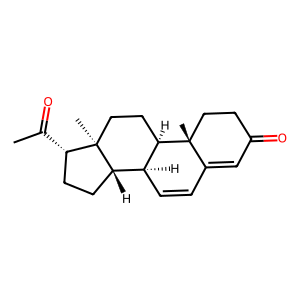

In [17]:
def random_molecule():
    clintox_data = load_data("clintox")
    return clintox_data["smiles"][np.random.randint(len(clintox_data))]

def display_molecule(molecule):
    print(molecule)
    return rdkit.Chem.Draw.MolToImage(rdkit.Chem.MolFromSmiles(molecule))

display_molecule(random_molecule())

There are multiple ways to convert a molecule from SMILES format into features that can be used by a model.

Option 1: Create Graph. This forces us to use something that takes graphs as inputs (e.g. graph neural networks)

In [28]:
ELEMENTS = {
    0: "X",
    1: "H",
    6: "C",
    7: "N",
    8: "O",
    9: "F",
    14: "Si",
    15: "P",
    16: "S",
    17: "Cl",
    80: "Hg",
}

def convert_to_graph(sml):
    """Argument for the RD2NX function should be a valid SMILES sequence
    returns: the graph
    """
    m = rdkit.Chem.MolFromSmiles(sml)
    m = rdkit.Chem.AddHs(m)
    order_string = {
        rdkit.Chem.rdchem.BondType.SINGLE: 1,
        rdkit.Chem.rdchem.BondType.DOUBLE: 2,
        rdkit.Chem.rdchem.BondType.TRIPLE: 3,
        rdkit.Chem.rdchem.BondType.AROMATIC: 4,
    }
    
    N = len(list(m.GetAtoms()))
    
    nodes = np.zeros((N, len(ELEMENTS)))
    lookup = list(ELEMENTS.keys())
    for i in m.GetAtoms():
        nodes[i.GetIdx(), lookup.index(i.GetAtomicNum())] = 1

    adj = np.zeros((N, N, 5))
    for j in m.GetBonds():
        u = min(j.GetBeginAtomIdx(), j.GetEndAtomIdx())
        v = max(j.GetBeginAtomIdx(), j.GetEndAtomIdx())
        order = j.GetBondType()
        if order in order_string:
            order = order_string[order]
        else:
            raise Warning("Ignoring bond order" + order)
        adj[u, v, order] = 1
        adj[v, u, order] = 1
    return nodes, adj


Option 2: Convert to single array.

In [19]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit import Chem, DataStructs


def convert_to_bits(smile):
    mol = Chem.rdmolfiles.MolFromSmiles(smile)
    
    fingerprint = rdMolDescriptors.GetMorganFingerprintAsBitVect(
        mol, radius=2, bitInfo={}, nBits=256, useChirality=True,
    )
    
    arr = np.zeros((1,), dtype=int)
    DataStructs.ConvertToNumpyArray(fingerprint, arr)

    return arr

Let's see what these features look like...

COC(CNC(=O)N)C[Hg]Cl


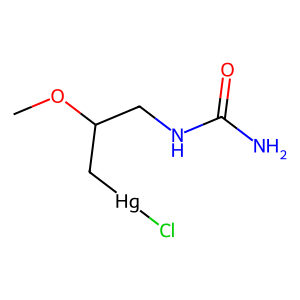

In [26]:
molecule = random_molecule()
display_molecule(molecule)

Note: if you get an error about a number not being in a list, that probably means that atomic number is missing from `ELEMENTS` above

In [30]:
convert_to_graph(molecule)

(array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.,

In [31]:
convert_to_bits(molecule)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])